# Hello World Machine Learning Project

This is a simple end-to-end machine learning project that demonstrates the workflow from data preprocessing to model deployment. The dataset used in this project contains student placement data, including CGPA, IQ, and placement status.

# Steps Overview

    Preprocessing + EDA + Feature Selection
    
    Extract input and output columns
    
    Scale the values
    
    Train-test split
    
    Train the model
    
    Evaluate the model
    
    Deploy the model



# Loading Required Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
import pickle

# Loading the Dataset

In [6]:
df = pd.read_csv('placement.csv')
df

# This reads the dataset into a Pandas DataFrame.

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


# Exploring the Dataset

In [12]:
df.shape

df.sample(5)
df.info()

# df.head() displays the first few rows of the dataset.

# df.info() provides information about the columns, data types, and missing values.

# df.shape gives the dimensions of the dataset (rows, columns).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


# Handling Missing Values
    If some rows have missing values in a column, we can handle them in multiple ways:

# Removing rows: If the missing values are few and removing them doesn't impact the dataset significantly.

In [22]:
df.dropna(inplace=True)

# Filling with mean/median/mode:

In [45]:
df['column_name'].fillna(df['column_name'].mean(), inplace=True)

# Using interpolation:

In [46]:
df['column_name'].interpolate(method='linear', inplace=True)

# Dropping Unnecessary Columns

In [13]:
df = df.iloc[:,1:]

# This removes the first column, assuming it is an index or an unwanted feature.
# In our case, all the independent variables are necessary

df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


# Visualizing the Data

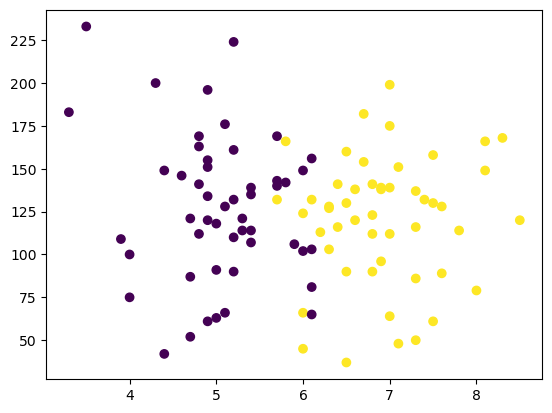

In [14]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

# This creates a scatter plot where:

# X-axis represents CGPA

# Y-axis represents IQ

# Color represents placement status

# Extracting Features and Target Variables

In [16]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

# X contains CGPA and IQ as input features.

# y contains placement status as the target variable.

# Splitting Data into Training and Testing Sets

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# train_test_split randomly splits the data into training (80%) and testing (10%) sets.

# Scaling the Features

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
# Standardization ensures that all features have a mean of 0 and standard deviation of 1, improving model performance.

# Training a Logistic Regression Model

In [19]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [20]:
# A Logistic Regression model is trained on the dataset.

# Making Predictions

In [22]:
y_pred = clf.predict(X_test)

# The trained model makes predictions on the test dataset.

# Evaluating the Model

In [23]:
accuracy_score(y_test, y_pred)

# The accuracy of the model is measured using the accuracy_score function.

0.9

# Visualizing Decision Boundaries

<Axes: >

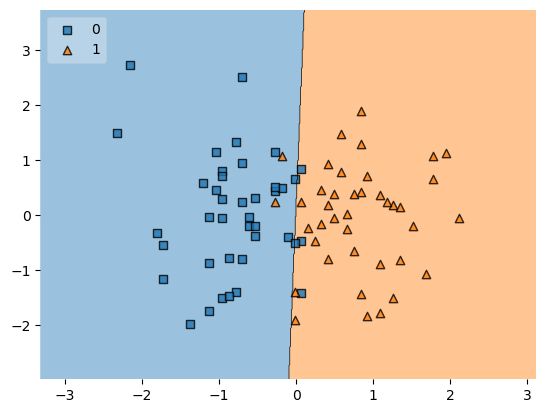

In [24]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

# This function plots the decision regions for classification.

# Saving the Model for Deployment

In [25]:
pickle.dump(clf, open('model.pkl', 'wb'))

# The trained model is saved as a .pkl file for future use.